In [2]:
from PIL import Image, ImageDraw
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

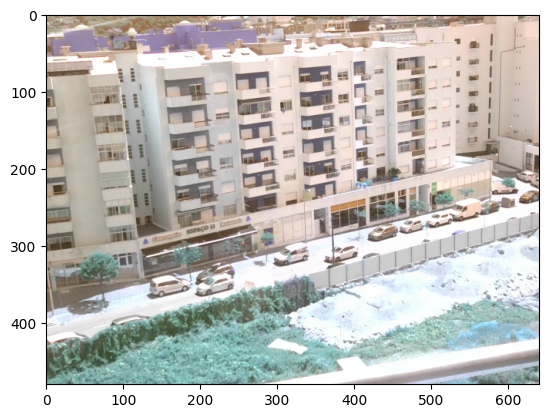

In [3]:
img = cv2.imread('real_img.jpg')
#img = Image.open('real_img.jpg').convert('RGB')
imgplot = plt.imshow(img)
plt.show()

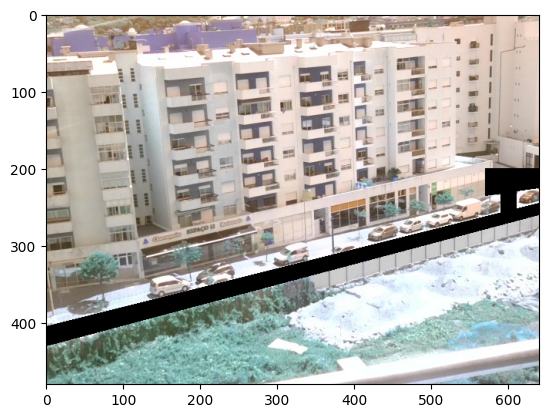

In [8]:
mask = np.ones(img.shape[:2], dtype="uint8")
cv2.fillPoly(mask, pts=[np.array([[0, 405], [640, 245], [640, 260], [0, 430]])], color=(0, 0, 0))
cv2.fillPoly(mask, pts=[np.array([[570, 200], [640, 200], [640, 225], [570, 235]])], color=(0, 0, 0))
cv2.fillPoly(mask, pts=[np.array([[590, 230], [610, 230], [610, 260], [590, 260]])], color=(0, 0, 0))
cv2.imshow("Rectangular Mask", mask)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(img, img, mask=mask)
imgplot = plt.imshow(masked)
plt.show()

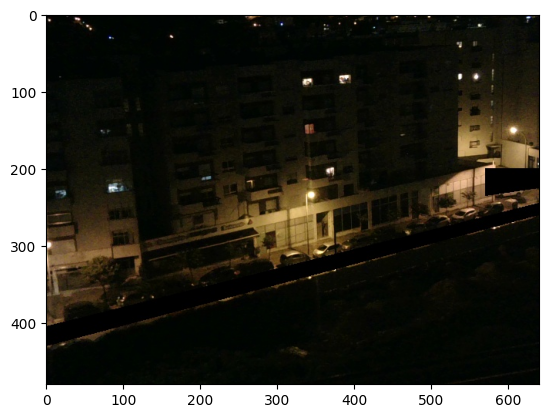

In [16]:
img = cv2.imread('real_img_3.jpg')
#img = Image.open('real_img.jpg').convert('RGB')
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

g_img = adjust_gamma(img,4.316)

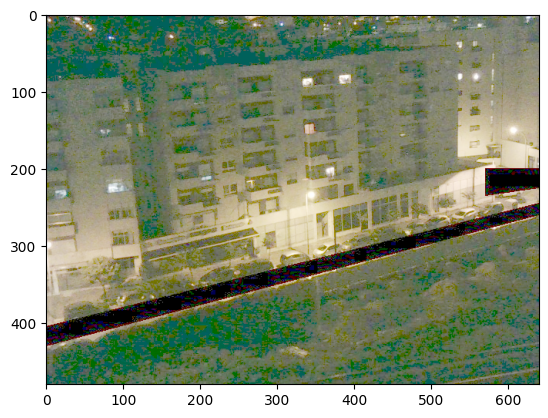

In [19]:
imgplot = plt.imshow(cv2.cvtColor(g_img, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:

def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

# The function addWeighted calculates
# the weighted sum of two arrays
cal = apply_brightness_contrast(g_img, 2, 5)

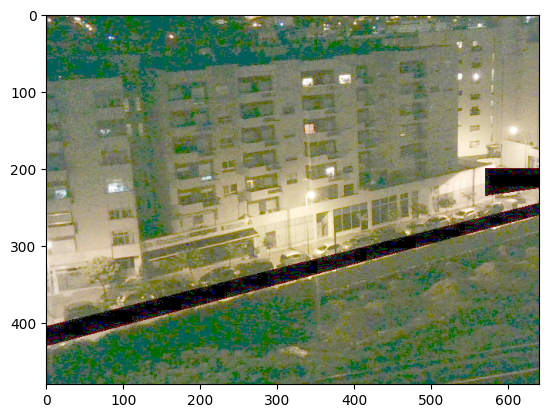

In [28]:
imgplot = plt.imshow(cv2.cvtColor(cal, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
cv2.imwrite('out.jpg', g_img)

True